In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('price_panel_daily.csv',index_col=0)
df

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,...,KRW-AXS,KRW-STX,KRW-XEC,KRW-SOL,KRW-MATIC,KRW-NU,KRW-AAVE,KRW-1INCH,KRW-ALGO,KRW-NEAR
2017-09-25 09:00:00,4322000.0,325000.0,28600.0,9800.0,57300.0,203.0,12100.0,11050.0,25.3,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4321000.0,321500.0,29300.0,9970.0,58000.0,211.0,12850.0,10850.0,30.2,5350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27 09:00:00,4657000.0,342500.0,35200.0,10450.0,62800.0,232.0,14250.0,11500.0,31.9,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28 09:00:00,4586000.0,332500.0,32500.0,9980.0,60100.0,222.0,14500.0,11450.0,31.4,5180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 09:00:00,4657000.0,327500.0,31850.0,9520.0,59100.0,220.0,14150.0,10850.0,30.7,5530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 09:00:00,61467000.0,4917000.0,35760.0,2770.0,188900.0,1120.0,45950.0,8260.0,89.9,19550.0,...,130100.0,2840.0,0.146,239100.0,3475.0,1000.0,324300.0,3340.0,1940.0,19600.0
2021-12-27 09:00:00,61508000.0,4896000.0,35810.0,2845.0,189000.0,1125.0,45710.0,8325.0,90.6,20000.0,...,130100.0,3170.0,0.145,237450.0,3315.0,992.0,335800.0,3405.0,2015.0,17950.0
2021-12-28 09:00:00,58274000.0,4650000.0,33150.0,2595.0,178750.0,1040.0,42820.0,7650.0,86.1,18150.0,...,122200.0,2790.0,0.134,217450.0,3055.0,911.0,309700.0,3115.0,1795.0,16350.0
2021-12-29 09:00:00,57089000.0,4456000.0,32010.0,2475.0,178300.0,1005.0,41890.0,7280.0,84.2,17560.0,...,115200.0,2620.0,0.132,209750.0,3045.0,905.0,289600.0,2975.0,1940.0,18330.0


Distance approcah의 경우 각각 코인의 euclidean distance를 구하고 가장 distance가 짧은 코인 pairs를 골라야한다.
오래된 코인일수록 비교적 새로 발행된 코인에 비해서 distance가 길게 나오게 되므로 가장 index가 긴 20개 코인을 이용한다.


In [6]:
df_new=df.iloc[:,0:20].copy()
df_new

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,KRW-XEM,KRW-QTUM,KRW-LSK,KRW-STEEM,KRW-XLM,KRW-ARDR,KRW-ARK,KRW-STORJ,KRW-GRS,KRW-REP
2017-09-25 09:00:00,4322000.0,325000.0,28600.0,9800.0,57300.0,203.0,12100.0,11050.0,25.3,4620.0,256.0,10500.0,6750.0,1205.0,13.1,153.0,3475.0,529.0,166.0,20600.0
2017-09-26 09:00:00,4321000.0,321500.0,29300.0,9970.0,58000.0,211.0,12850.0,10850.0,30.2,5350.0,253.0,10700.0,6760.0,1200.0,13.8,153.0,3245.0,549.0,173.0,21050.0
2017-09-27 09:00:00,4657000.0,342500.0,35200.0,10450.0,62800.0,232.0,14250.0,11500.0,31.9,5710.0,269.0,11250.0,6980.0,1330.0,15.9,218.0,3535.0,596.0,184.0,23050.0
2017-09-28 09:00:00,4586000.0,332500.0,32500.0,9980.0,60100.0,222.0,14500.0,11450.0,31.4,5180.0,259.0,11450.0,6510.0,1560.0,15.1,196.0,3235.0,574.0,167.0,24450.0
2017-09-29 09:00:00,4657000.0,327500.0,31850.0,9520.0,59100.0,220.0,14150.0,10850.0,30.7,5530.0,267.0,11150.0,6330.0,1845.0,14.7,199.0,3075.0,550.0,152.0,23000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 09:00:00,61467000.0,4917000.0,35760.0,2770.0,188900.0,1120.0,45950.0,8260.0,89.9,19550.0,170.0,12010.0,3665.0,565.0,352.0,309.0,1575.0,2505.0,938.0,23360.0
2021-12-27 09:00:00,61508000.0,4896000.0,35810.0,2845.0,189000.0,1125.0,45710.0,8325.0,90.6,20000.0,169.0,12120.0,3715.0,562.0,363.0,314.0,1630.0,2490.0,937.0,23160.0
2021-12-28 09:00:00,58274000.0,4650000.0,33150.0,2595.0,178750.0,1040.0,42820.0,7650.0,86.1,18150.0,156.0,11120.0,3435.0,525.0,336.0,284.0,1480.0,2220.0,883.0,21730.0
2021-12-29 09:00:00,57089000.0,4456000.0,32010.0,2475.0,178300.0,1005.0,41890.0,7280.0,84.2,17560.0,153.0,10750.0,3360.0,506.0,328.0,275.0,1410.0,2105.0,839.0,21120.0


distance를 계산할때 가격을 minmax scaling 후 이용해야한다

In [7]:
def mm_scaler(df):
    for i in df.columns:
        df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))
    return df

In [8]:
df1=df_new[0:900].copy()
df2=df_new[900:].copy()

In [9]:
df1=mm_scaler(df1)
df2=mm_scaler(df2)
df1

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,KRW-XEM,KRW-QTUM,KRW-LSK,KRW-STEEM,KRW-XLM,KRW-ARDR,KRW-ARK,KRW-STORJ,KRW-GRS,KRW-REP
2017-09-25 09:00:00,0.029507,0.112598,0.089685,0.594779,0.076184,0.005713,0.138844,0.255309,0.015809,0.178175,0.077694,0.084934,0.111376,0.097285,0.000000,0.049341,0.218189,0.104741,0.019585,0.087966
2017-09-26 09:00:00,0.029465,0.110889,0.092498,0.605296,0.077895,0.007617,0.151692,0.250449,0.021151,0.211120,0.076635,0.086798,0.111562,0.096833,0.000580,0.049341,0.203173,0.109452,0.021631,0.090715
2017-09-27 09:00:00,0.043568,0.121145,0.116205,0.634991,0.089631,0.012616,0.175675,0.266242,0.023005,0.227367,0.082281,0.091926,0.115659,0.108597,0.002320,0.076360,0.222106,0.120522,0.024847,0.102932
2017-09-28 09:00:00,0.040588,0.116261,0.105356,0.605914,0.083030,0.010236,0.179957,0.265027,0.022460,0.203448,0.078752,0.093791,0.106907,0.129412,0.001657,0.067215,0.202520,0.115340,0.019877,0.111484
2017-09-29 09:00:00,0.043568,0.113819,0.102744,0.577456,0.080585,0.009760,0.173961,0.250449,0.021696,0.219244,0.081575,0.090994,0.103555,0.155204,0.001326,0.068462,0.192074,0.109687,0.015493,0.102627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 09:00:00,0.262623,0.073893,0.024350,0.008228,0.089338,0.017139,0.066638,0.009500,0.005560,0.030373,0.006527,0.008717,0.032606,0.008145,0.039771,0.010059,0.007900,0.015946,0.035954,0.041600
2020-03-09 09:00:00,0.256327,0.075554,0.023627,0.009094,0.087846,0.018567,0.077687,0.010180,0.005560,0.029921,0.006845,0.009323,0.033165,0.010860,0.042340,0.009561,0.007508,0.015710,0.037416,0.047648
2020-03-10 09:00:00,0.249948,0.072697,0.022944,0.008599,0.084423,0.018567,0.073233,0.010253,0.005560,0.039625,0.006633,0.009090,0.031303,0.012217,0.041180,0.009644,0.007377,0.015239,0.037708,0.046487
2020-03-11 09:00:00,0.247261,0.067813,0.020493,0.007671,0.078580,0.016901,0.066467,0.008868,0.005233,0.041881,0.005963,0.008764,0.022923,0.012398,0.039274,0.008189,0.005680,0.013355,0.035077,0.045082


In [10]:

def find_distance(a,b):
    dist=np.linalg.norm(a-b)
    return dist
    

In [11]:
"""
def pair_distant(df):
    pair=dict()
    columns=list(df.columns)
    for coin in columns:
        del columns[columns.index(coin)]
        for i in columns:
            temp=df[[i,j]]
            temp.dropna(inplace=True)
            pair_list=[coin,i]
            dist=find_distance(temp[i],temp[j])
            pair[dist]=pair_list
    return pair
"""

'\ndef pair_distant(df):\n    pair=dict()\n    columns=list(df.columns)\n    for coin in columns:\n        del columns[columns.index(coin)]\n        for i in columns:\n            temp=df[[i,j]]\n            temp.dropna(inplace=True)\n            pair_list=[coin,i]\n            dist=find_distance(temp[i],temp[j])\n            pair[dist]=pair_list\n    return pair\n'

20개 코인을 이용하여 pairs를 구하고 각 pairs 중에서 distance가 가장 짧은 pairs를 구한다

In [12]:
columns=list(df1.columns)
pair=dict()
for coin in columns:
    del columns[columns.index(coin)]
    for i in columns:
        temp=df1[[coin,i]].copy()
        temp.dropna(inplace=True)
        pairs=[coin,i]
        dist=find_distance(temp[coin],temp[i])
        pair[dist]=pairs
    
            


In [13]:
key_list=list(pair.keys())
key_list=sorted(key_list)[0:5]
print(key_list)

[1.0965042183713298, 1.2022941575095258, 1.217321581184527, 1.2567625024809417, 1.2821935877748405]


In [14]:
pair[key_list[0]]
#스테이터스네트워크토큰과 넴으로 구성된 pairs가 가장 distance가 짧다

['KRW-SNT', 'KRW-XEM']

In [15]:
coin_pair=df2[pair[key_list[0]]].copy()
coin_pair.columns=['snt_norm','xem_norm']
coin_pair['spread_norm']=coin_pair['snt_norm']-coin_pair['xem_norm']


In [16]:
mean=np.mean(coin_pair['spread_norm'])
std=np.std(coin_pair['spread_norm'])
print(mean,std)

0.0021705178316593836 0.13625413951337353


In [17]:
coin_pair=coin_pair.join(df[['KRW-SNT', 'KRW-XEM']])
coin_pair['spread']=coin_pair['KRW-SNT']-coin_pair['KRW-XEM']
coin_pair['total']=coin_pair['KRW-SNT']+coin_pair['KRW-XEM']

In [18]:
coin_pair['total_return']=np.log(coin_pair['total']/coin_pair['total'].shift(1))
coin_pair['spread_return']=np.log(coin_pair['spread']/coin_pair['spread'].shift(1))

코인 pairs 가격의 minmax scale의 차가 threshold(=mean + or- 2*std)에서 벗어나면 각각 숏과 롱을 한다

In [20]:
coin_pair['position']=np.where(coin_pair['spread_norm']>mean+2*std,-1,np.nan)
coin_pair['position']=np.where(coin_pair['spread_norm']<mean-2*std,1,coin_pair['position'])
coin_pair['position']=np.where(coin_pair['spread_norm']*coin_pair['spread_norm'].shift(1)<0,0,coin_pair['position'])
coin_pair['position']=coin_pair['position'].ffill().fillna(0)


In [21]:
coin_pair['strategy']=(coin_pair['spread_return'])*coin_pair['position'].shift(1)
coin_pair.dropna(inplace=True)
coin_pair['position'].value_counts()



 0.0    355
-1.0    261
 1.0     41
Name: position, dtype: int64

total_return    4.144852
strategy        1.640006
dtype: float64


<AxesSubplot:>

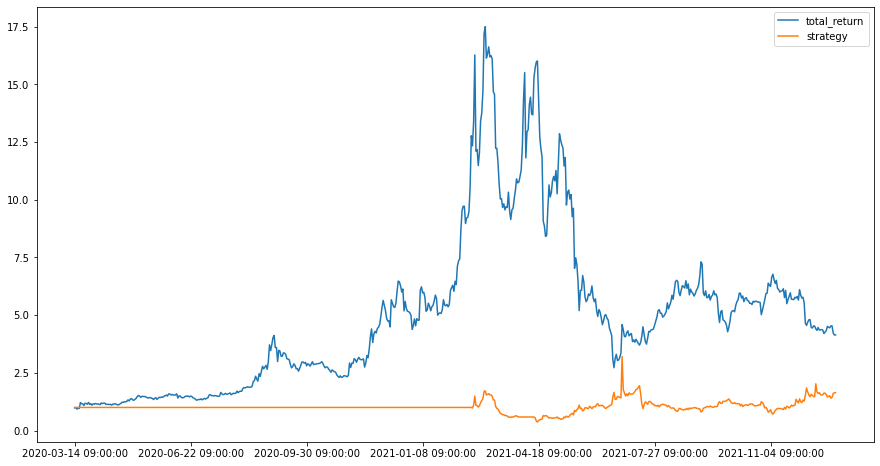

In [22]:
print(coin_pair[['total_return','strategy']].sum().apply(np.exp))
coin_pair[['total_return','strategy']].cumsum().apply(np.exp).plot(figsize=(15,8))